In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []

dem = 0
for imgpath in glob.glob('/content/drive/MyDrive/Team/*.bmp'):
  n = cv2.imread(imgpath)
  # print('BanXHieu' in imgpath)
  if dem%10 == 0:
    x_test.append(n)
  else:
    x_train.append(n)
  name1 = 'Nguyen'
  name2 = 'Thai'
  name3 = 'Tri'
  if name1 in imgpath:
    y_train.append([0])
  elif name2 in imgpath:
    y_train.append([1])
  elif name3 in imgpath:
    y_train.append([2])
  dem += 1
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)


y_test = []
i = 0
while x_train.shape[0] < y_train.shape[0]:
  y_test.append(y_train[i])
  y_train = np.delete(y_train, i)
  i += 9
y_test = np.array(y_test)
y_train = list(y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
from keras.utils.np_utils import to_categorical

# Chuyen don vi mau thanh so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(250,250,3)))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))                                                                                                                         

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))                                                                                                                         

model = Sequential()
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))  

In [ ]:
from keras.layers import Dense
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  # Dense: full-connected (tất cả các tế bào thần kinh đều kết nối với nhau)
model.add(Dense(3, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)  # lr: learning rate: tốc độ học, momentum: momen động lượng, sự dao động :D?
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
1/1 [==============================] - 17s 17s/step - loss: 1.0656 - accuracy: 0.6667 - val_loss: 105.2705 - val_accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 8s 8s/step - loss: 102.1229 - accuracy: 0.3333 - val_loss: 351.4075 - val_accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 6s 6s/step - loss: 346.3381 - accuracy: 0.6667 - val_loss: 3.2615 - val_accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 5s 5s/step - loss: 3.3089 - accuracy: 0.3333 - val_loss: 1.0866 - val_accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 4s 4s/step - loss: 1.0387 - accuracy: 0.3333 - val_loss: 0.5628 - val_accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 4s 4s/step - loss: 0.5486 - accuracy: 0.6667 - val_loss: 0.5120 - val_accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 5s 5s/step - loss: 0.5498 - accuracy: 0.6667 - val_loss: 0.3762 - val_accuracy: 0.6667
Epoch 8/15
1/1 [===============

In [ ]:
model.save('3FaceDetection.h5')

In [ ]:
from google.colab import files
upload = files.upload()

Saving Nguyen_0000.bmp to Nguyen_0000.bmp


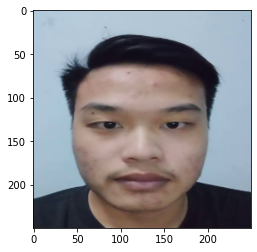

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('Nguyen_0000.bmp', target_size=(250,250)) 
img1 = load_img('Tri_0027.bmp', target_size=(250,250)) 
img2 = load_img('Thai_0015.bmp', target_size=(250,250)) 
plt.imshow(img)


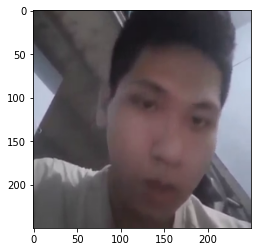

In [ ]:
plt.imshow(img1)

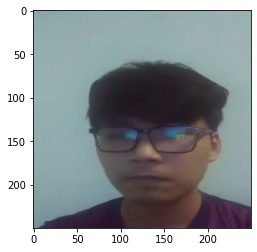

In [ ]:
plt.imshow(img2)


[0. 1. 0.]


In [ ]:
img1 = img_to_array(img1)
img1 = img1.reshape(1,250,250,3)
img1 = img1.astype('float32')
img1 /= 255
print(model.predict(img1))
np.argmax(model.predict(img1), axis=1)

[[8.0316850e-11 1.1602102e-02 9.8839790e-01]]


array([2])

In [ ]:
img2 = img_to_array(img2)
img2 = img2.reshape(1,250,250,3)
img2 = img2.astype('float32')
img2 /= 255
print(model.predict(img2))
np.argmax(model.predict(img2), axis=1)

[[8.389795e-04 9.901446e-01 9.016357e-03]]


array([1])

In [ ]:
img = img_to_array(img)
img = img.reshape(1,250,250,3)
img = img.astype('float32')
img /= 255
print(model.predict(img))
np.argmax(model.predict(img), axis=1)

[[7.4458081e-01 2.5539145e-01 2.7781216e-05]]


array([0])